In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [17]:
cols = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'class']
df = pd.read_csv('magic04.data', delimiter=',', header=None, names=cols)
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,g
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,g
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,g
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,g
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,g


In [18]:
df['class'].unique()

array(['g', 'h'], dtype=object)

In [19]:
# as there are just two classes, we can convert them to 0 and 1
df['class'] = df['class'].map({'g': 1, 'h': 0})
#or
# df['class'] = df['class'].replace({'g': 1, 'h': 0})
#or
# df['class'] = df['class'].apply(lambda x: 1 if x == 'g' else 0)
#or
# df['class'] = (df['class'] == 'g').astype(int)

In [20]:
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist,class
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828,1
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610,1
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880,1
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370,1
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620,1


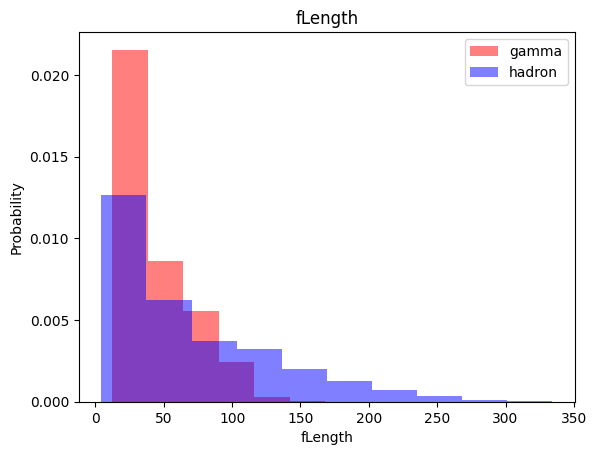

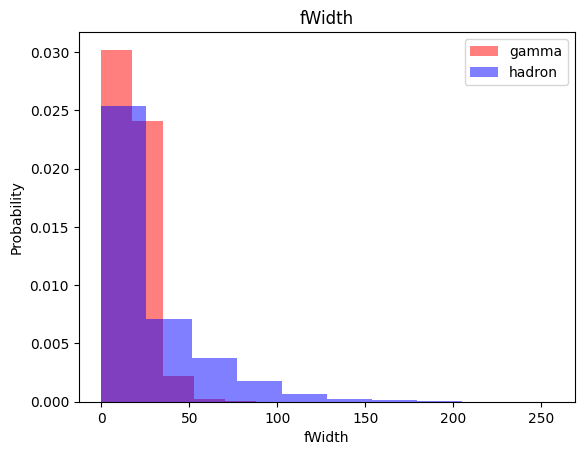

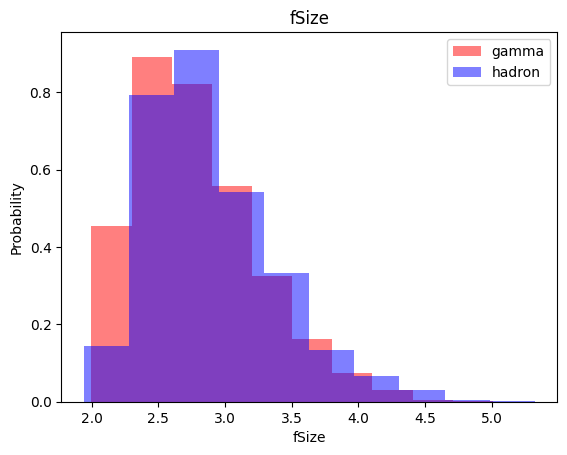

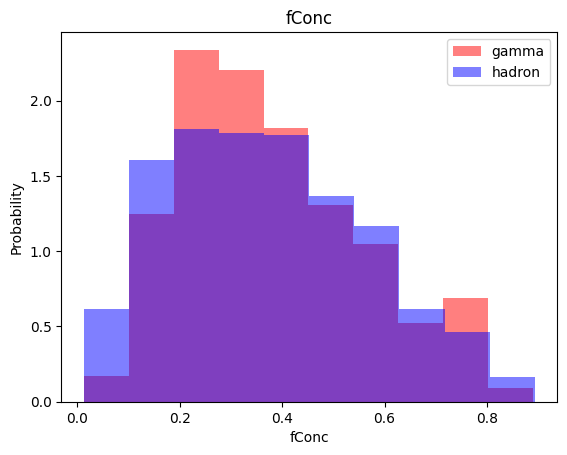

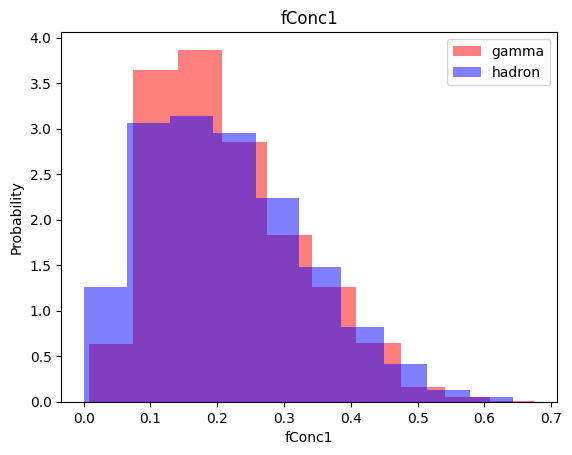

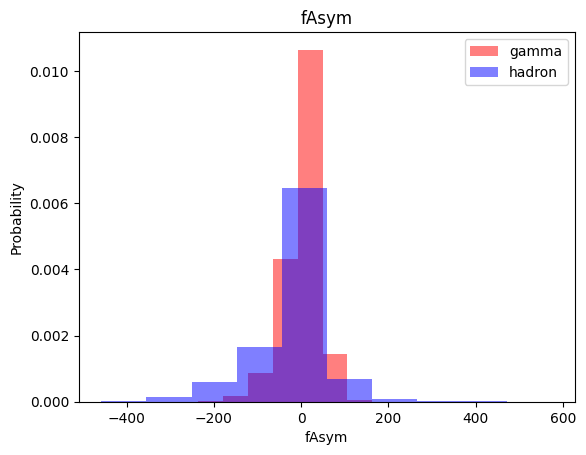

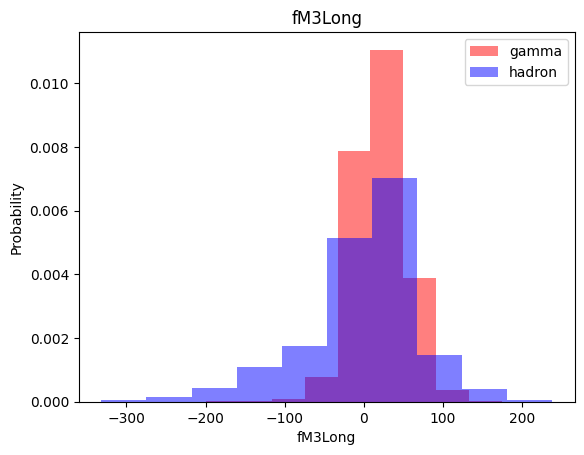

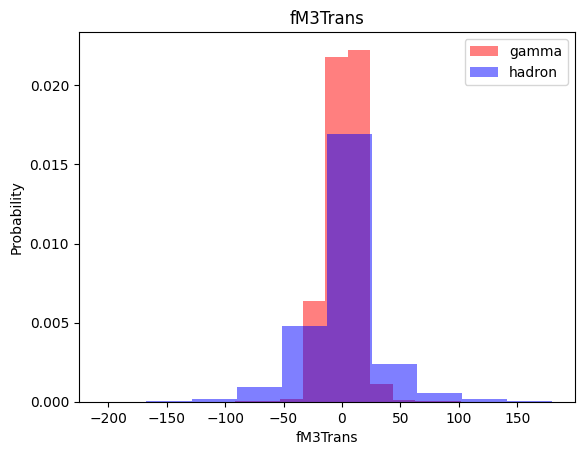

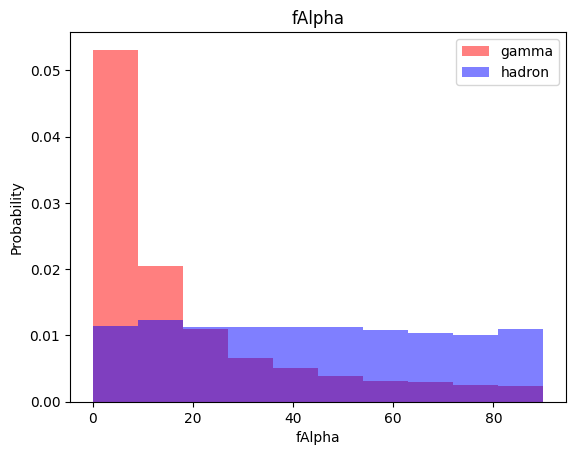

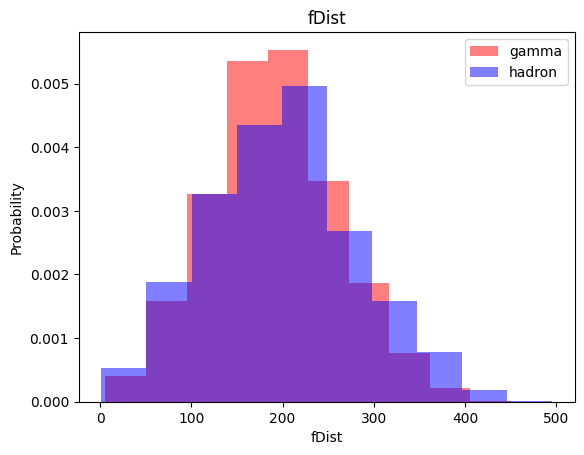

In [42]:
x = 1
for label in cols[:-1]:
    plt.hist(df[df['class'] == 1][label], alpha=0.5, label='gamma',color='red', density=True)
    plt.hist(df[df['class'] == 0][label], alpha=0.5, label='hadron', color='blue', density=True)
    plt.title(label)
    plt.legend(loc='upper right')
    plt.ylabel('Probability')
    plt.xlabel(label)
    plt.show()

In [43]:
# Split the data into training, validation and test sets
train, validate, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])